<a href="https://colab.research.google.com/github/Pramitreddy17/ML/blob/main/bonus_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset (replace with your dataset path)
df = pd.read_csv('customer_churn.csv')

# Display first few rows to understand the structure of the dataset
df.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [ ]:
# Handle missing values (for simplicity, we will drop rows with missing values here)
df.dropna(inplace=True)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop('Churn', axis=1)  # Replace 'Churn' with the actual target variable name
y = df['Churn']

# Split the dataset into train and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


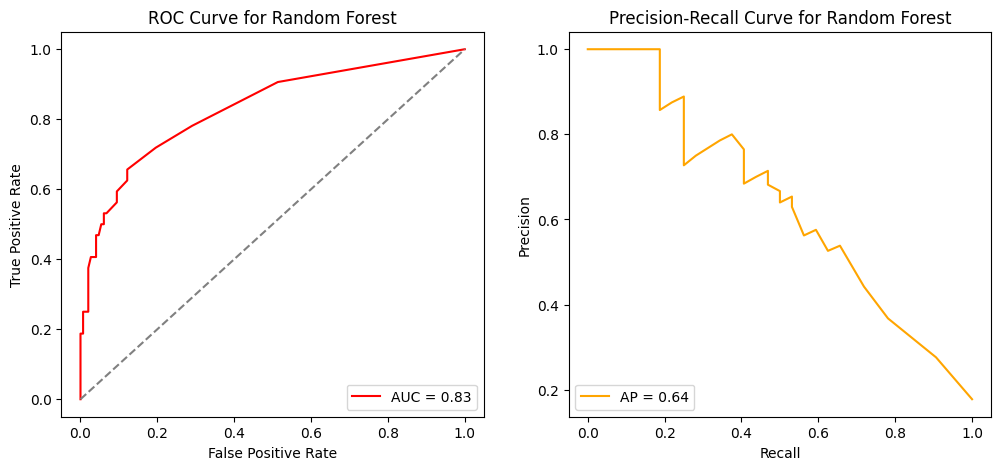

ROC AUC for Random Forest: 0.83


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test_scaled)

# ROC Curve and Precision-Recall Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])

# Plot ROC and Precision-Recall Curves for Random Forest
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='red', label=f'AUC = {auc(fpr_rf, tpr_rf):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, color='orange', label=f'AP = {auc(recall_rf, precision_rf):.2f}')
plt.title('Precision-Recall Curve for Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()

# Calculate AUC for ROC Curve
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC for Random Forest: {roc_auc_rf:.2f}")


In [ ]:
# Feature selection using Random Forest
sfm = SelectFromModel(rf, threshold='mean', max_features=10)
sfm.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[sfm.get_support()]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',
       'Onboard_date_2015-07-30 02:34:43',
       'Location_30668 Isabella Freeway Suite 428 Lake Kellyhaven, MP 89074-5017',
       'Company_Carter, Murphy and Valenzuela',
       'Company_Knight, Hammond and Mccoy', 'Company_Smith Inc'],
      dtype='object')
